In [4]:
import pandas as pd
from plotnine import *
from tensorflow import keras
from keras import models
from keras import layers
from keras import losses
from tensorflow.keras import optimizers
from keras import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn import metrics


In [5]:
db = pd.read_csv("games.csv")
db.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


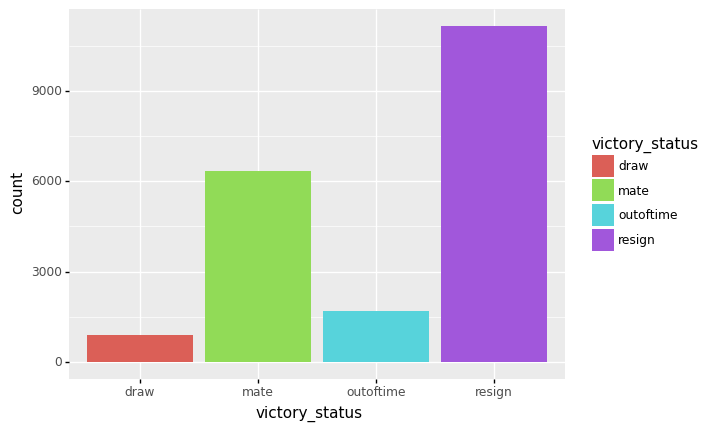

<ggplot: (166062638144)>

In [18]:
ggplot(db) + aes(x="victory_status", fill="victory_status") + geom_bar()

In [33]:
victory = db["victory_status"]
victory_count = victory.value_counts()

In [35]:
print(victory_count)

resign       11147
mate          6325
outoftime     1680
draw           906
Name: victory_status, dtype: int64


<AxesSubplot:ylabel='victory_status'>

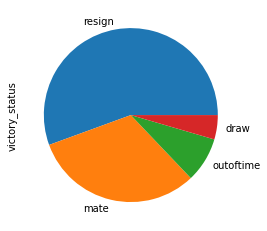

In [34]:
victory_count.plot(kind='pie')

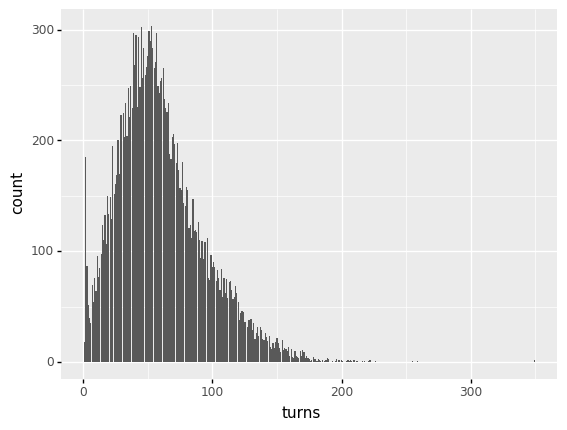

<ggplot: (166063793637)>

In [29]:
ggplot(db) + aes(x="turns", fill="turns") + geom_bar()

In [28]:
db2 = db["turns"].mean()
db2

60.46599860404826

In [36]:
db3 = db["opening_ply"].mean()
db3

4.8169807558081565

In [ ]:
#Two things, maybe make a model that predicts which wins depending on rating? 
#Use a different predictive model for the same topic as others did?
#Predict who won by the amount of turns? <Won't be accurate
#Predict who won by the end turn? <does that matter?
#Predict what opening move they will do depending on their rating? <How do I do that